In [1]:
import tensorflow as tf 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
print("Shape dari train data: ",trainX.shape,"shape dari label",trainY.shape)
print("Shape dari train data: ",testX.shape,"shape dari label",testY.shape)

Shape dari train data:  (50000, 32, 32, 3) shape dari label (50000, 1)
Shape dari train data:  (10000, 32, 32, 3) shape dari label (10000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


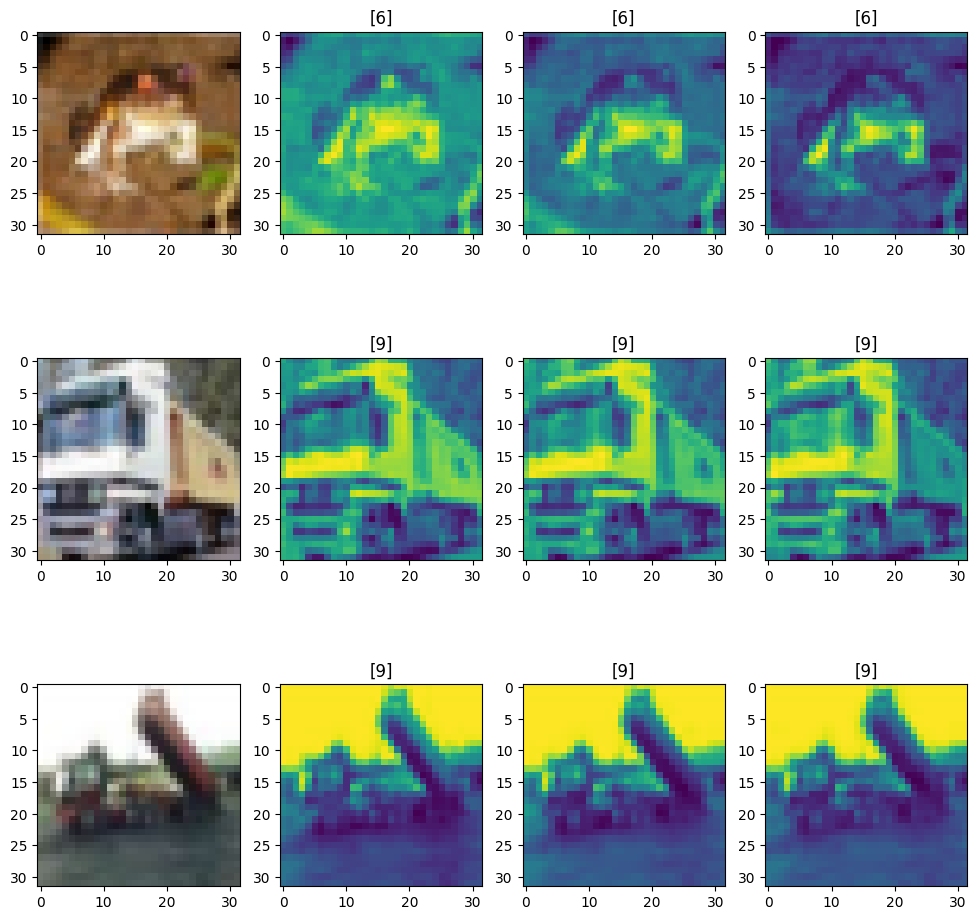

In [4]:
JUMLAH_GAMBAR=3
fig, axs = plt.subplots(JUMLAH_GAMBAR,4,figsize=(12,12))
for gambar in range(JUMLAH_GAMBAR):
    for warna in range(4):
        if(warna==0):
            axs[gambar,warna].imshow(trainX[gambar],cmap=None)
            continue
        axs[gambar,warna].set_title(trainY[gambar])
        axs[gambar,warna].imshow(trainX[gambar,:,:,warna-1],cmap=None)

## Filter

(5, 30, 30, 20) dengan activation relu
(5, 30, 30, 20) dengan activation sigmoid
(5, 30, 30, 20) dengan activation None
(5, 30, 30, 20) dengan activation softmax
(5, 30, 30, 20) dengan activation softplus
(5, 30, 30, 20) dengan activation softsign


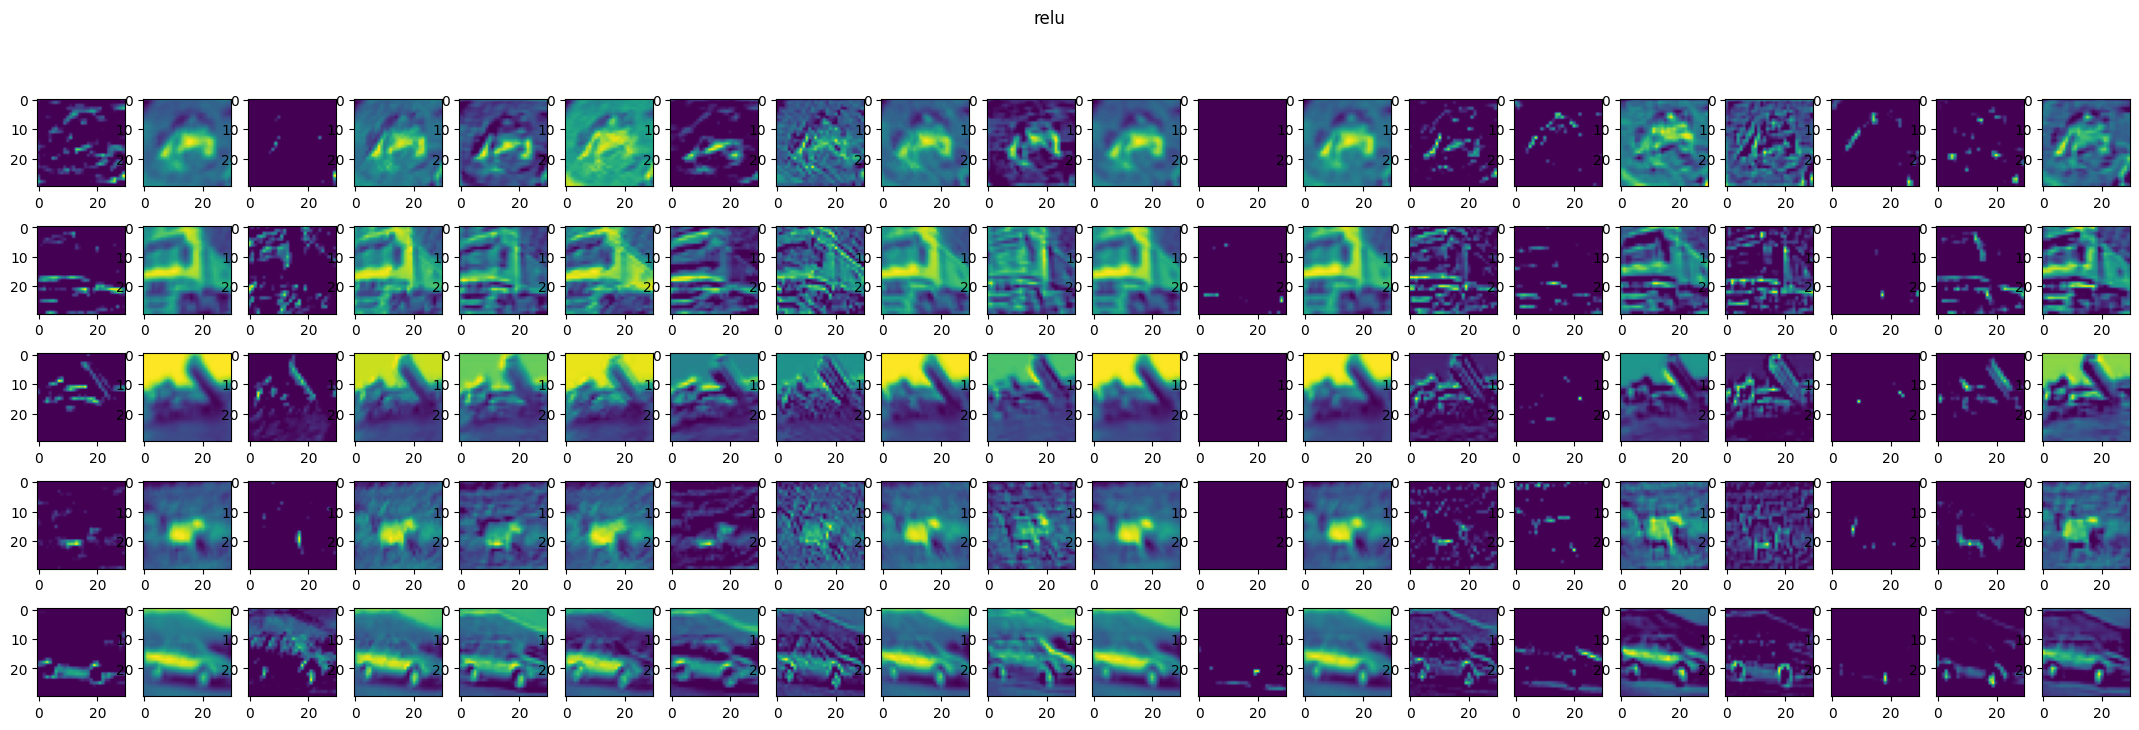

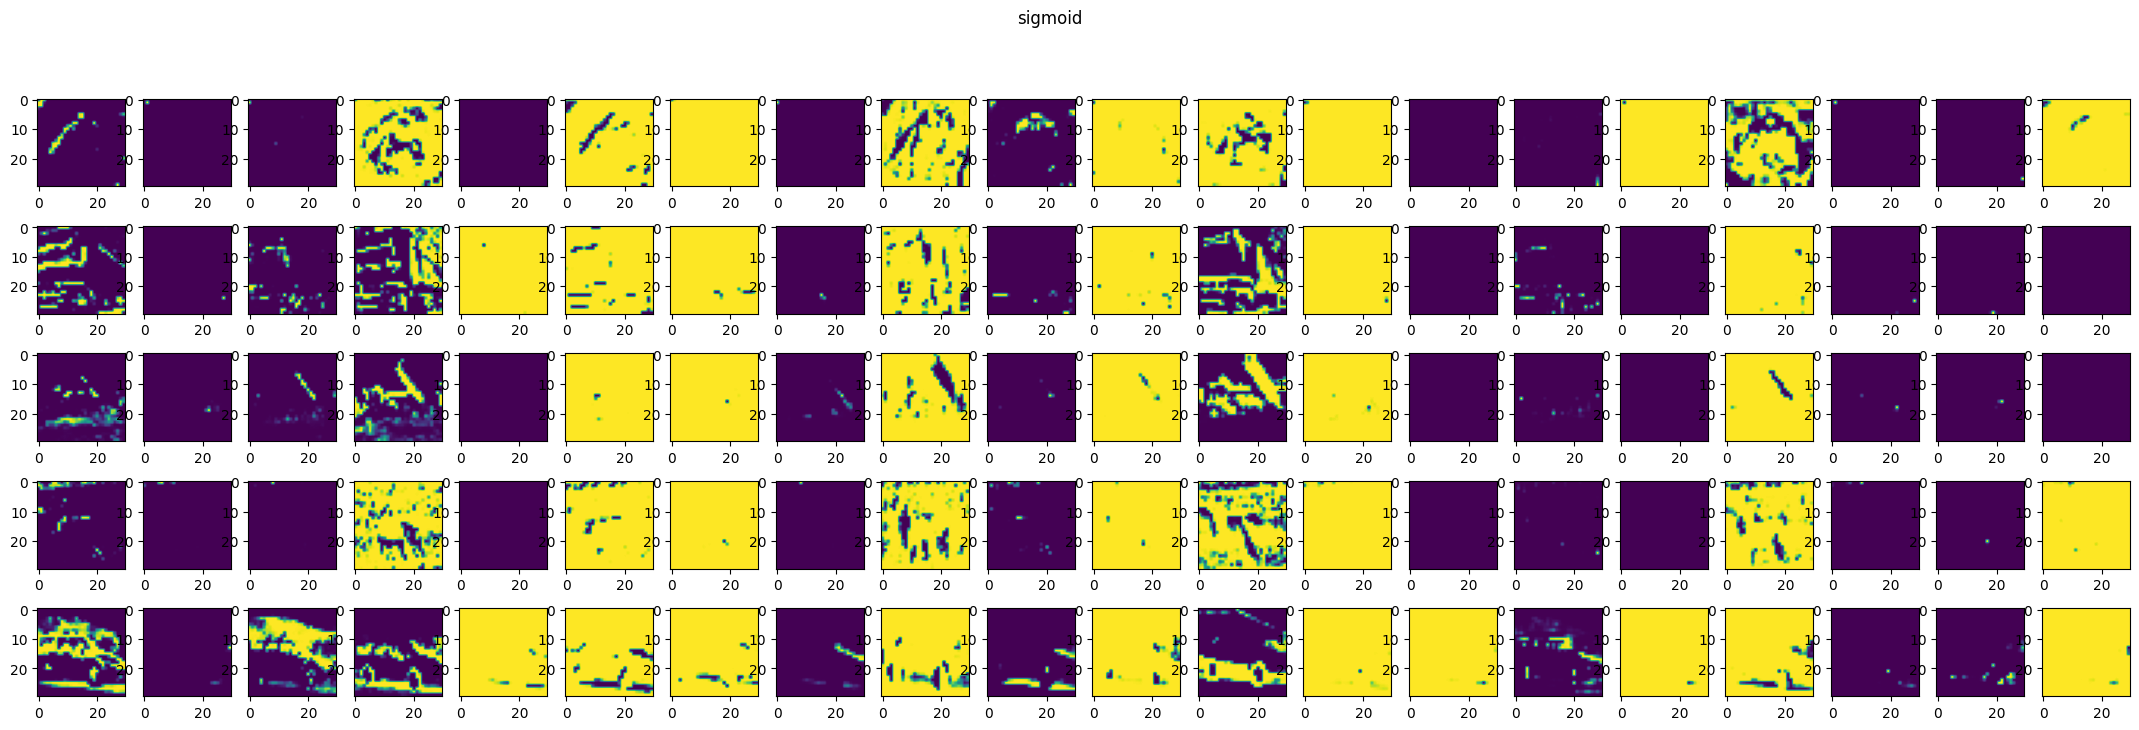

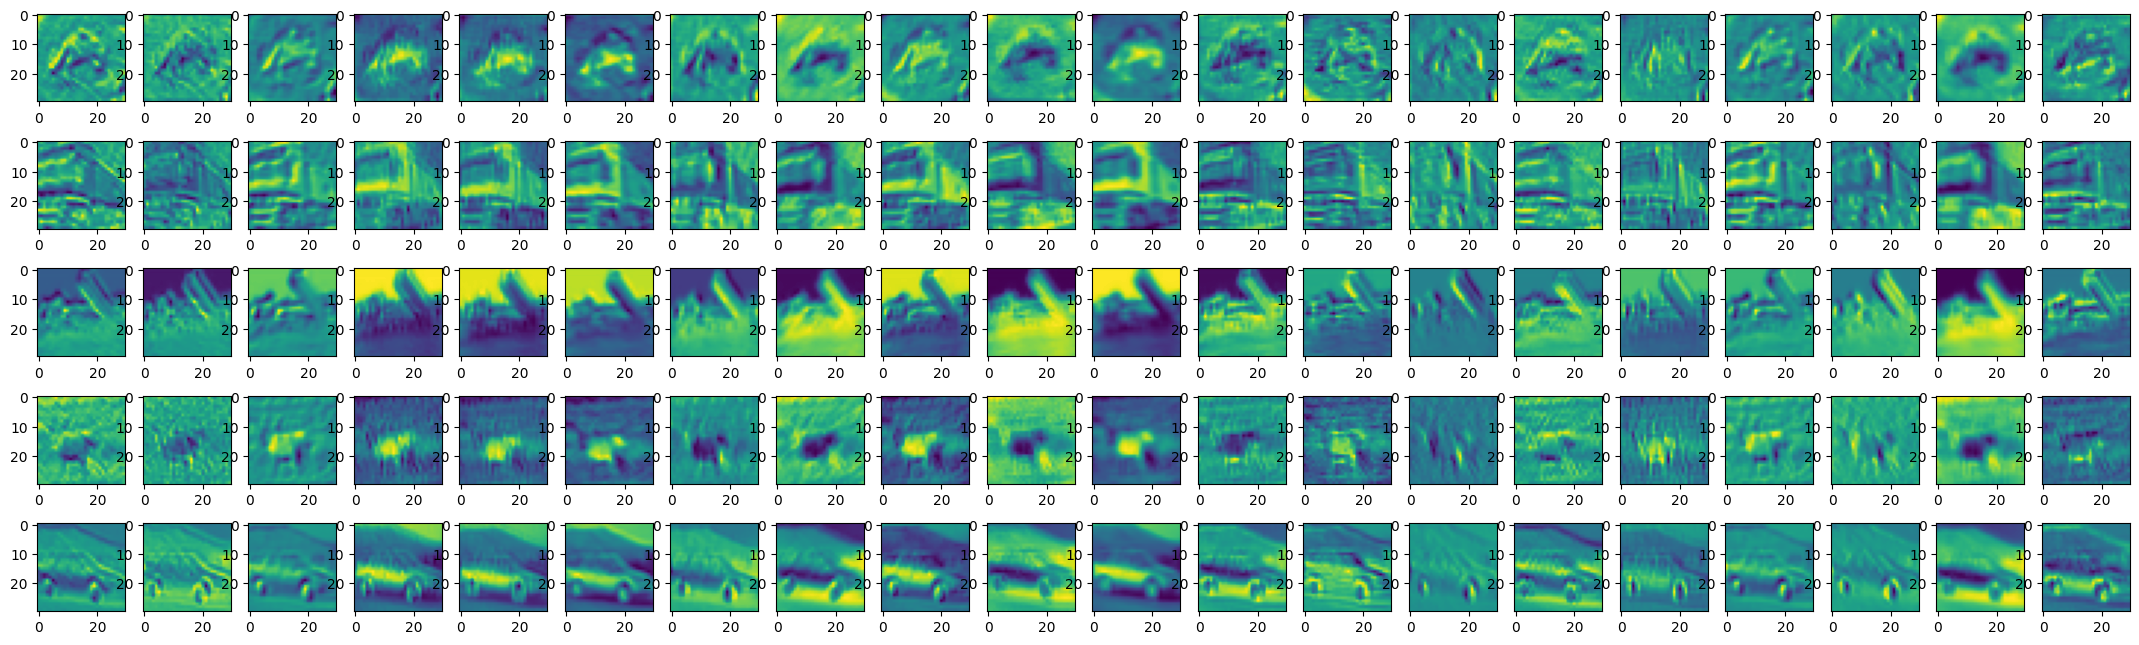

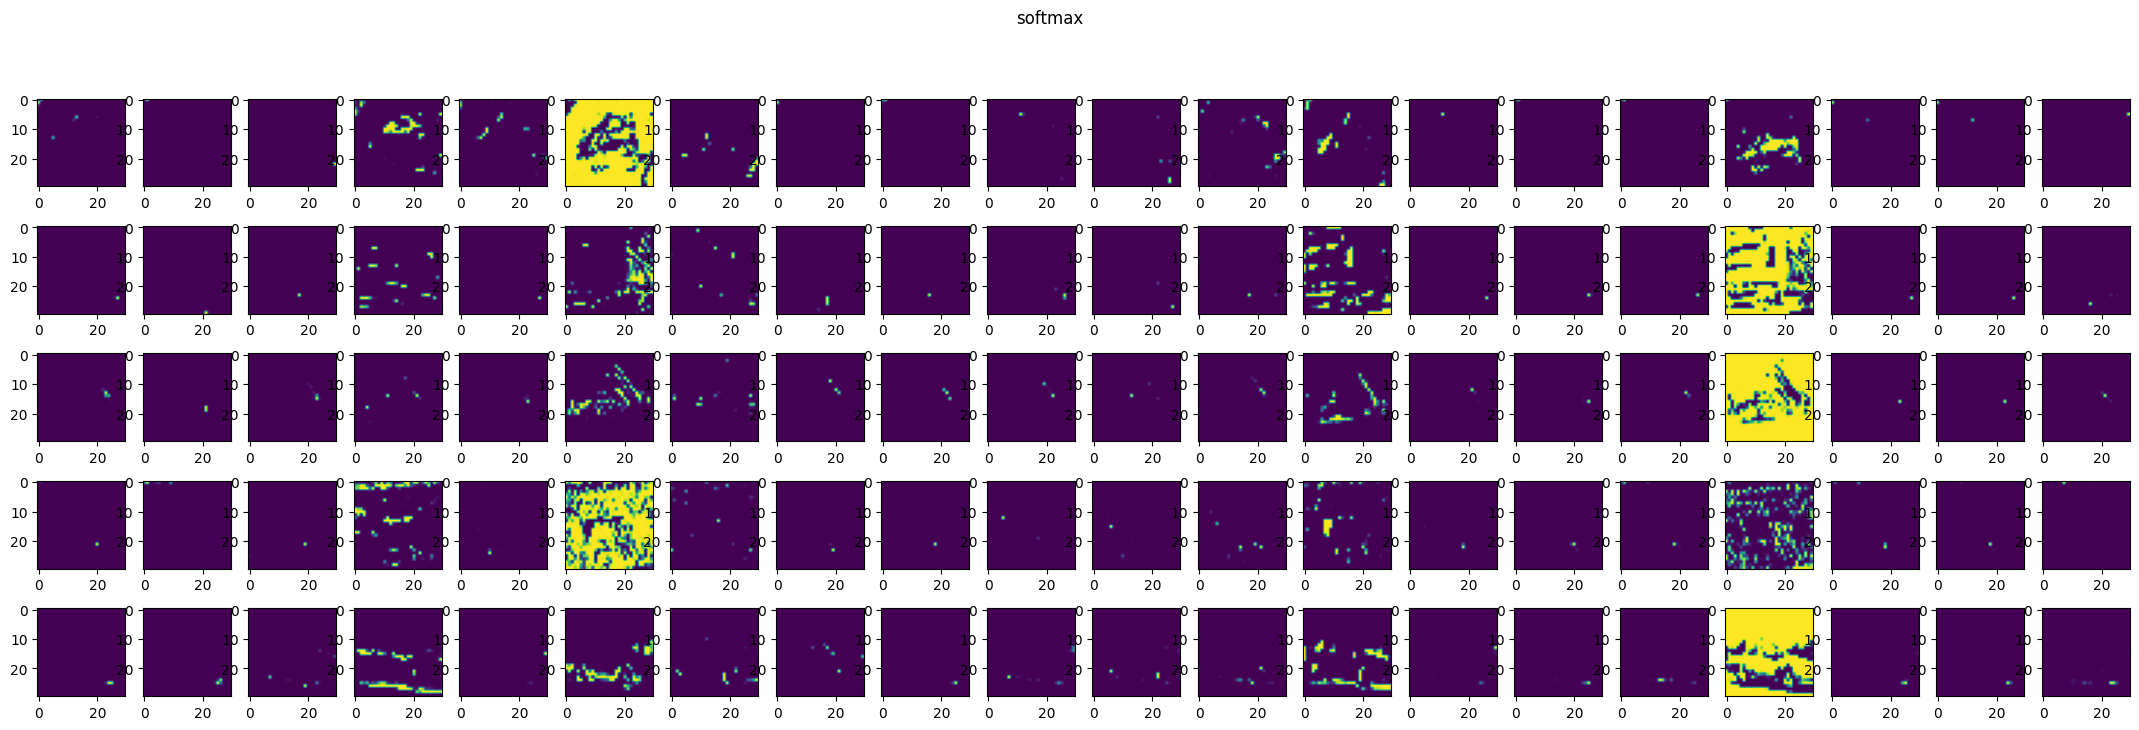

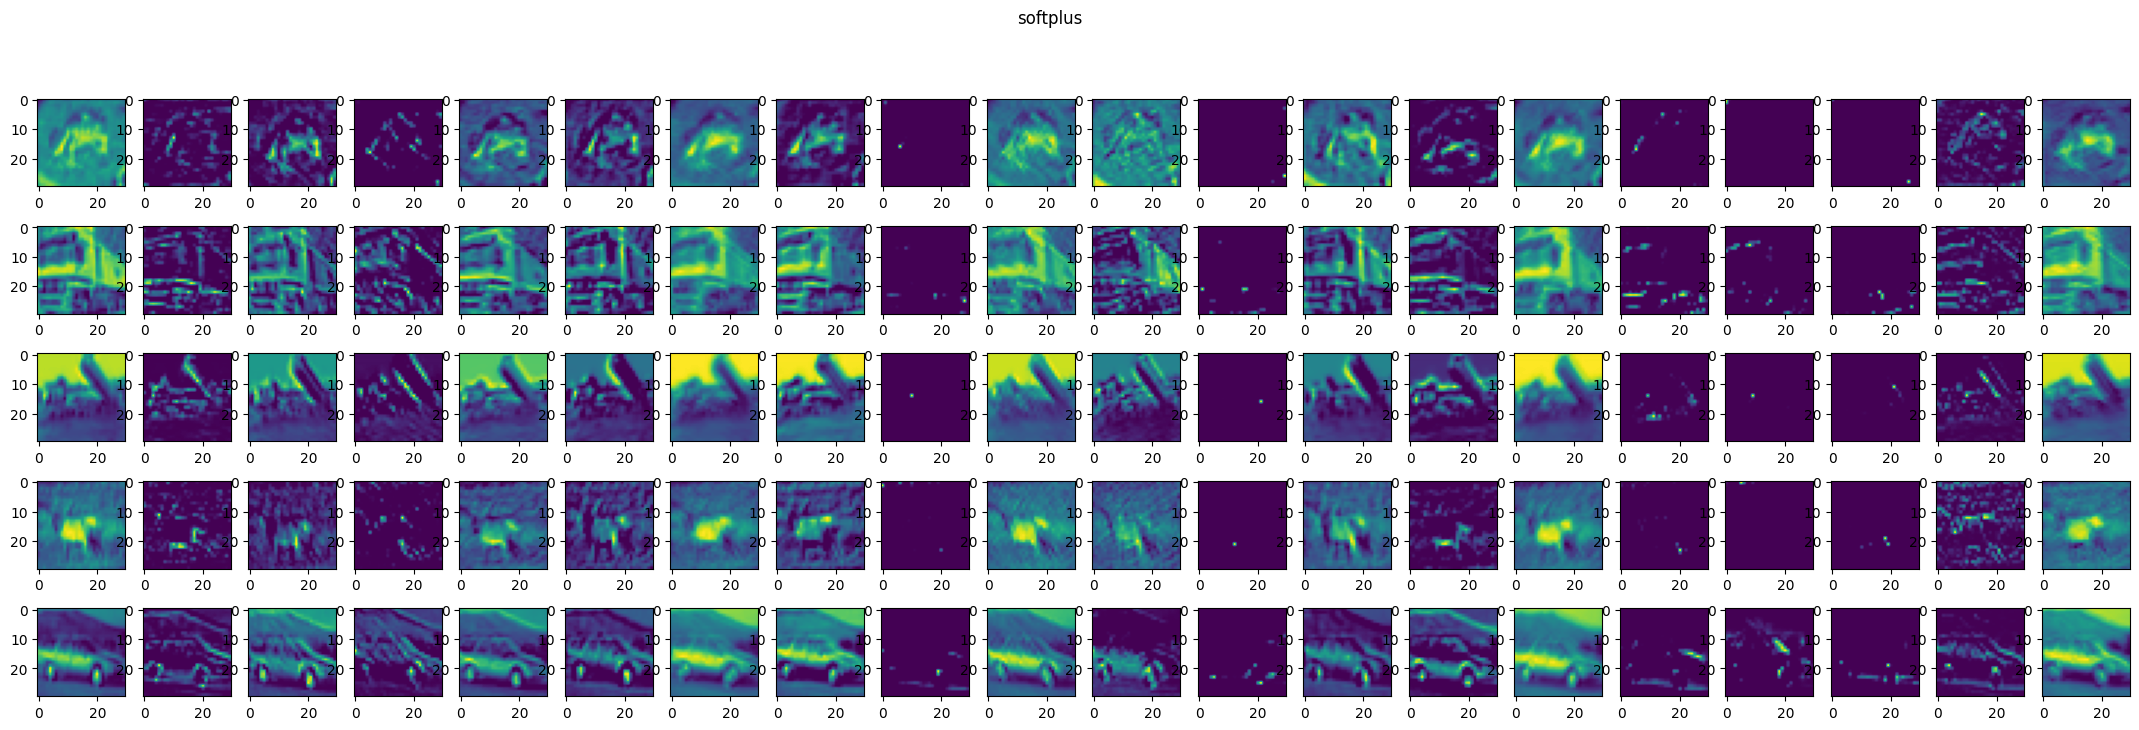

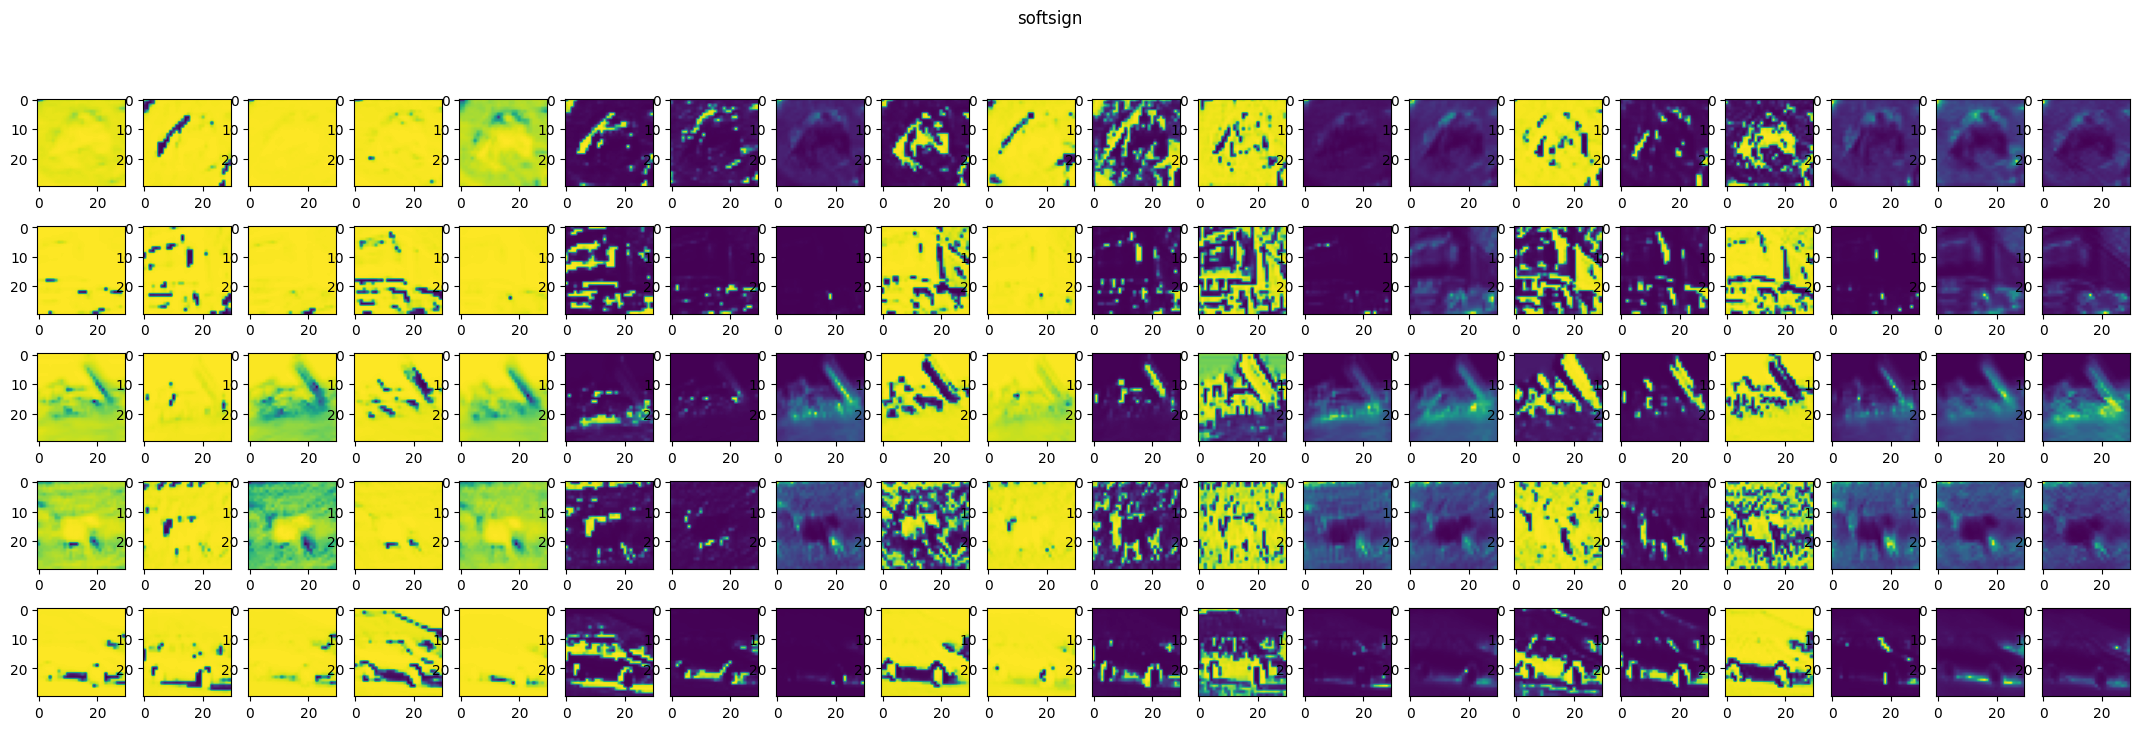

In [5]:
import tensorflow.keras.layers as la
NUM_FILTER=20
MANY_PICTURES=5
ACTIVATIONS=["relu","sigmoid",None,"softmax","softplus","softsign"]
sample=trainX[0:MANY_PICTURES].astype("float32")



for activation in ACTIVATIONS:
    conv=la.Conv2D(NUM_FILTER, (3,3), activation=activation, input_shape=(32, 32, 3))
    result=conv(sample)
    print(result.shape, "dengan activation",activation)
    fig, axs = plt.subplots(MANY_PICTURES,NUM_FILTER,figsize=(NUM_FILTER+7,MANY_PICTURES+3))
    fig.suptitle(activation)
    for gambar in range(MANY_PICTURES):
        for filter in range(NUM_FILTER):
            axs[gambar,filter].imshow(result[gambar,:,:,filter],cmap=None)


## Pooling

(2, 28, 28, 7)
(2, 28, 28, 7)
(2, 28, 28, 7)
(2, 28, 28, 7)
(2, 28, 28, 7)
(2, 28, 28, 7)


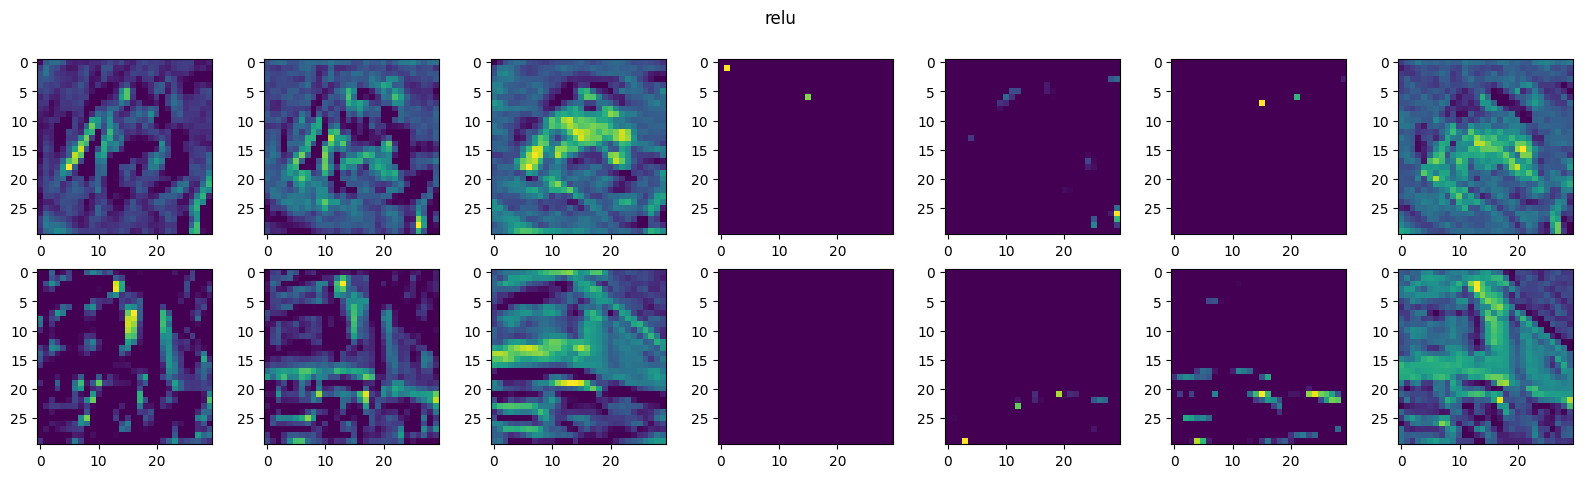

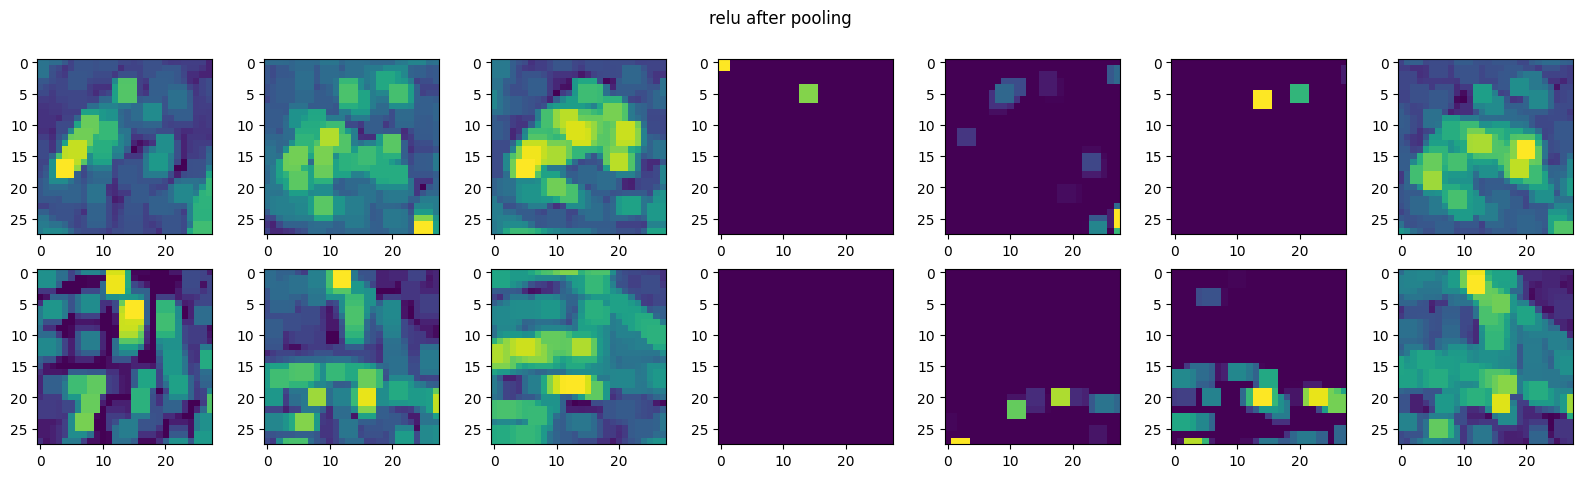

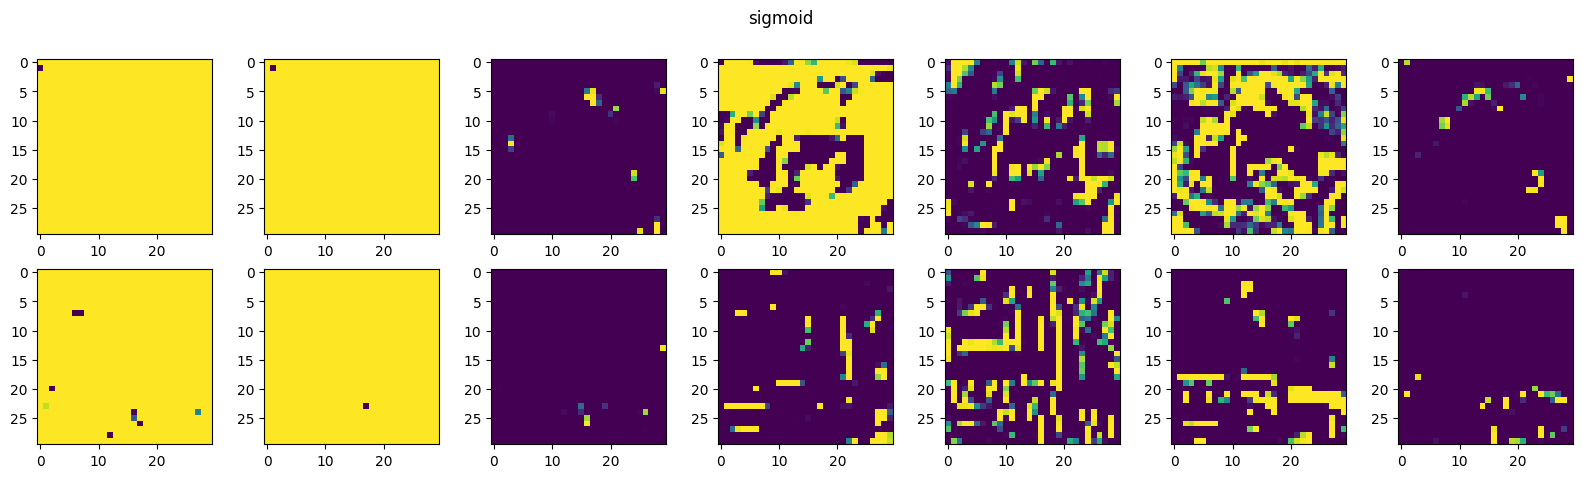

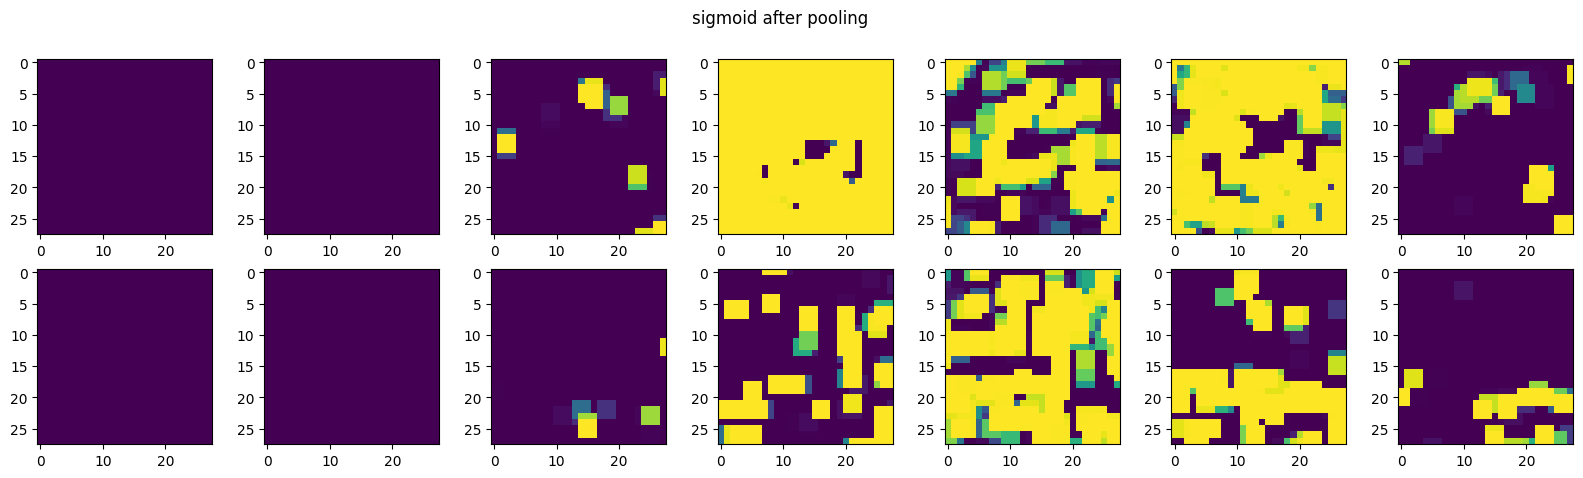

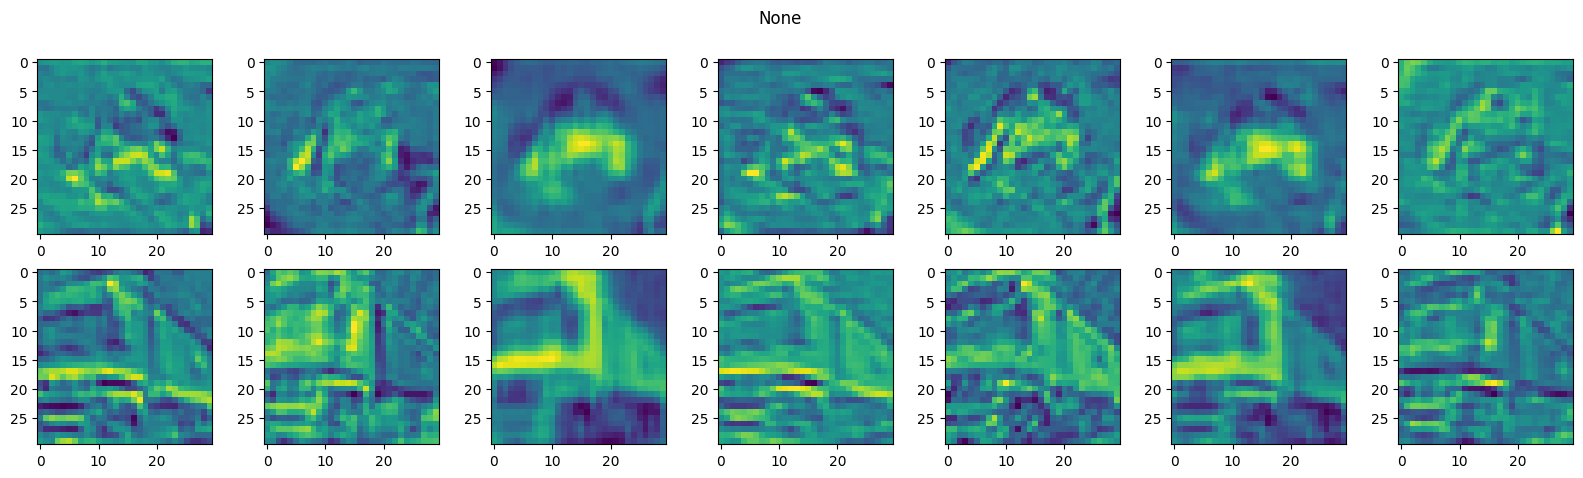

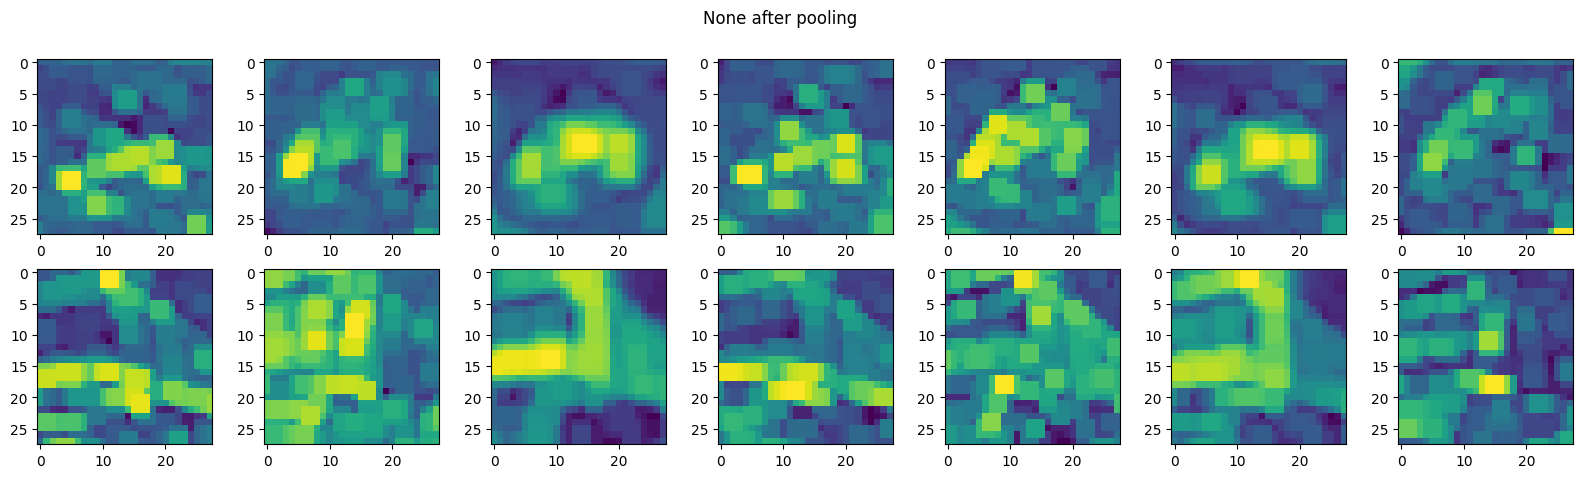

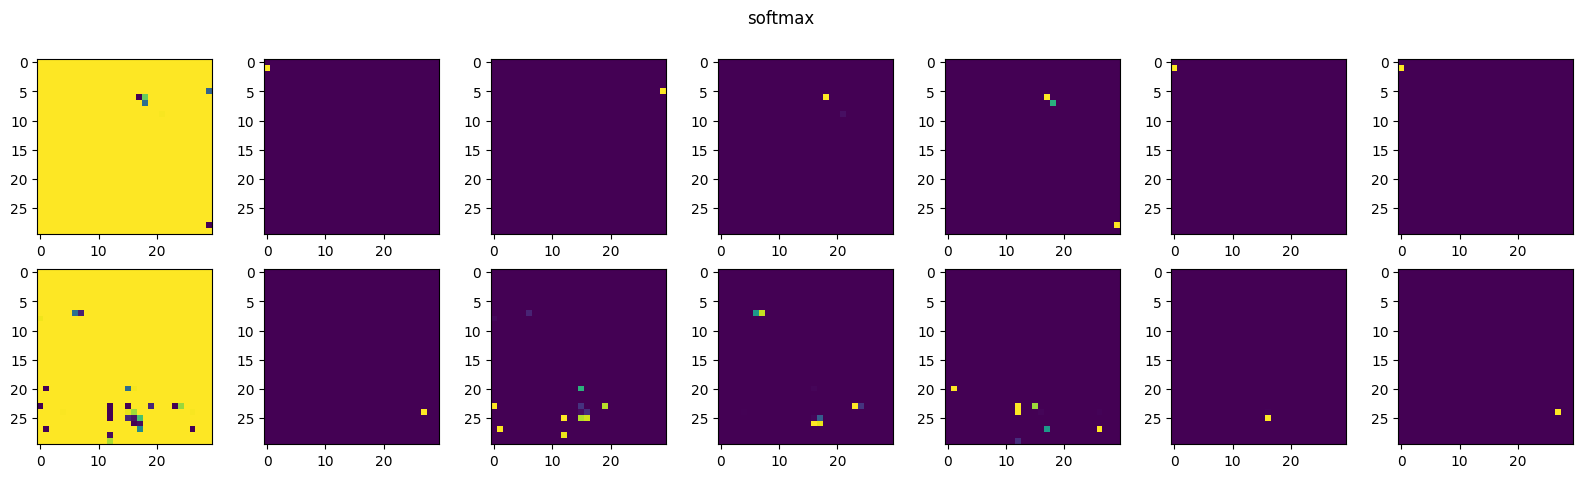

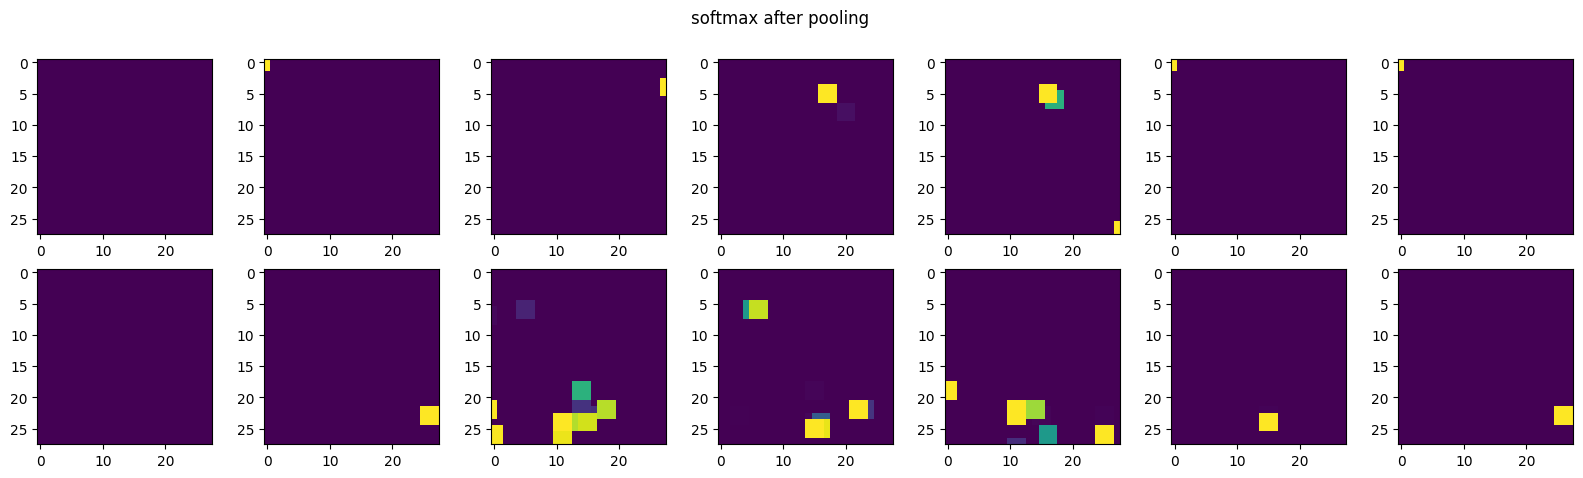

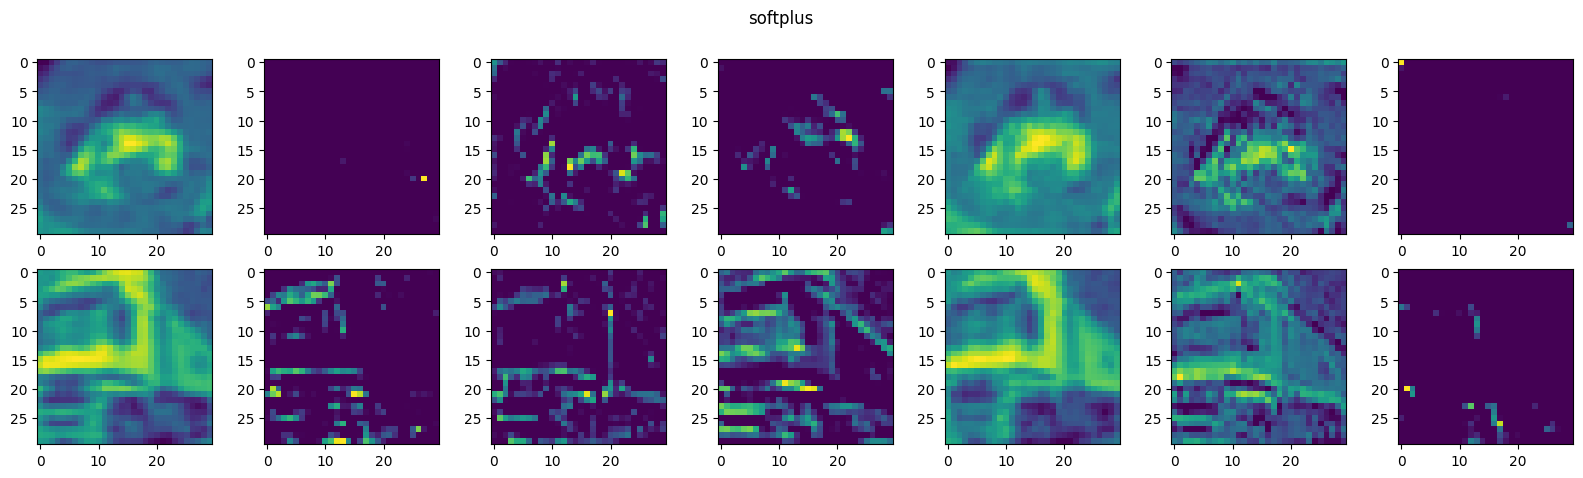

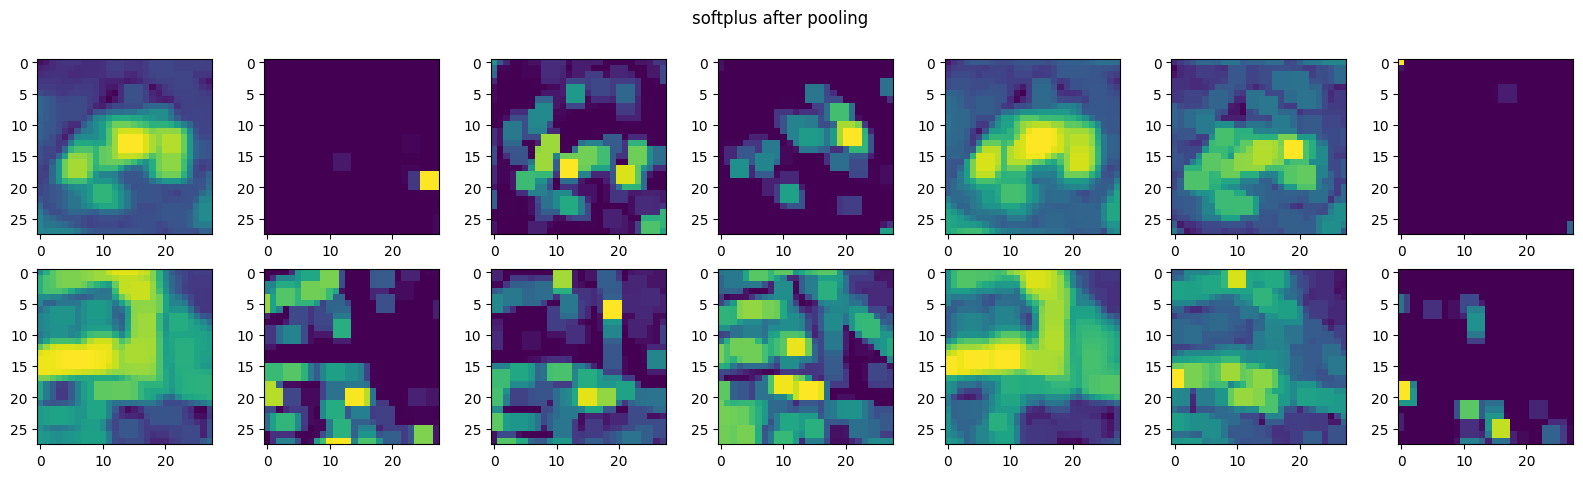

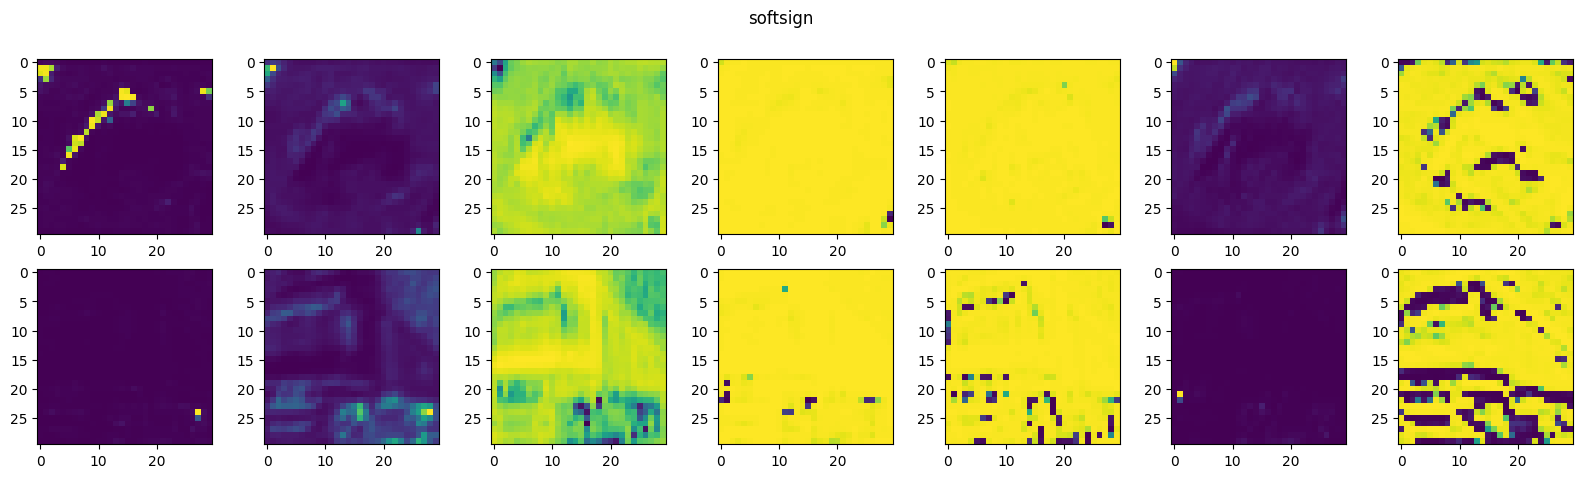

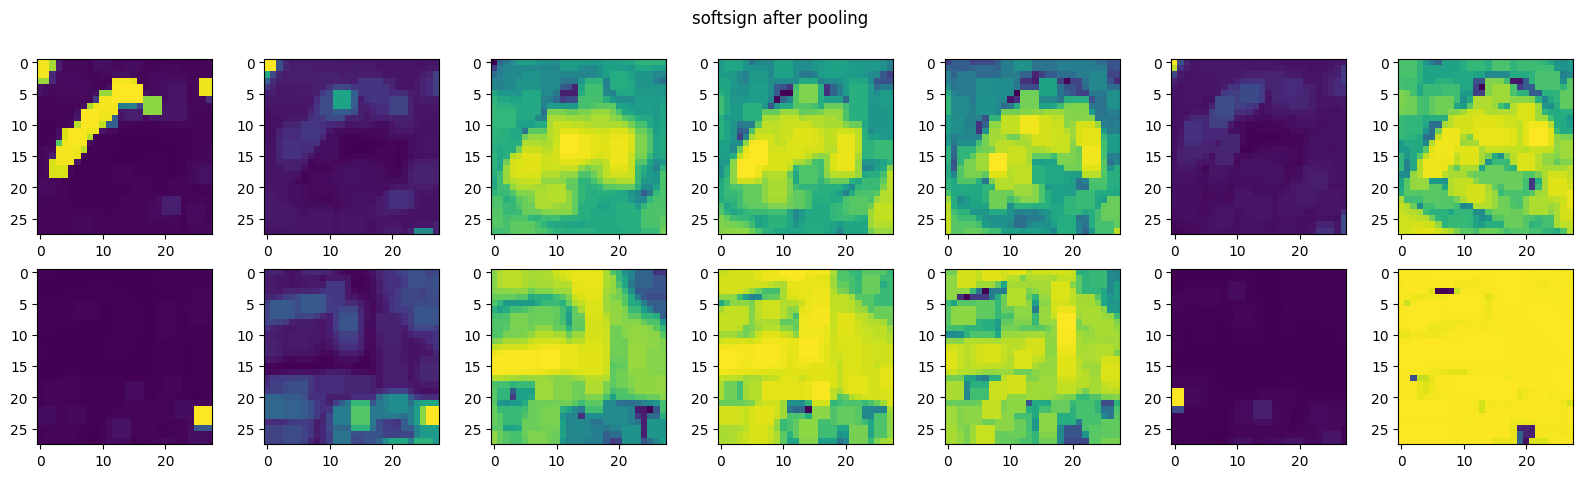

In [6]:
import tensorflow.keras.layers as la
NUM_FILTER=7
MANY_PICTURES=2
ACTIVATIONS=["relu","sigmoid",None,"softmax","softplus","softsign"]
sample=trainX[0:MANY_PICTURES].astype("float32")



for activation in ACTIVATIONS:
    conv=la.Conv2D(NUM_FILTER, (3,3), activation=activation, input_shape=(32, 32, 3))
    result=conv(sample)
    result_Pool=tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=(1, 1), padding='valid')(result)
    print(result_Pool.shape)
    fig, axs = plt.subplots(MANY_PICTURES,NUM_FILTER,figsize=(20,5))
    fig.suptitle(str(activation))
    for gambar in range(MANY_PICTURES):
        for filter in range(NUM_FILTER):
            axs[gambar,filter].imshow(result[gambar,:,:,filter],cmap=None)
        
    fig, axs = plt.subplots(MANY_PICTURES,NUM_FILTER,figsize=(20,5))
    fig.suptitle(str(activation)+" after pooling")
    for gambar in range(MANY_PICTURES):
        for filter in range(NUM_FILTER):
            axs[gambar,filter].imshow(result_Pool[gambar,:,:,filter],cmap=None)
    


# MinMax Only

## Preprocessing

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
ig=ImageDataGenerator(rescale=1./255.0)
trainY=tf.keras.utils.to_categorical(trainY)
testY=tf.keras.utils.to_categorical(testY)

In [9]:
trainY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
normalizedTrainX=ig.flow(trainX,trainY,batch_size=256)
normalizedTestX=ig.flow(testX,testY,batch_size=5000)

## Model Building

In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (2,2), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 31, 31, 64)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       32896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 6, 6, 256)         131328    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 256)        0

In [12]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.03,momentum=0.9),
    metrics=["accuracy",]
)

In [13]:
EPOCHS=70
history = model.fit(
      normalizedTrainX,
      epochs=EPOCHS,
      validation_data=normalizedTestX,
      verbose=2)

Epoch 1/70
196/196 - 9s - loss: 2.0214 - accuracy: 0.2555 - val_loss: 1.6316 - val_accuracy: 0.4200 - 9s/epoch - 48ms/step
Epoch 2/70
196/196 - 6s - loss: 1.5628 - accuracy: 0.4315 - val_loss: 1.3936 - val_accuracy: 0.4960 - 6s/epoch - 29ms/step
Epoch 3/70
196/196 - 4s - loss: 1.3664 - accuracy: 0.5060 - val_loss: 1.2255 - val_accuracy: 0.5710 - 4s/epoch - 23ms/step
Epoch 4/70
196/196 - 6s - loss: 1.2287 - accuracy: 0.5617 - val_loss: 1.0889 - val_accuracy: 0.6200 - 6s/epoch - 29ms/step
Epoch 5/70
196/196 - 5s - loss: 1.1007 - accuracy: 0.6092 - val_loss: 0.9886 - val_accuracy: 0.6559 - 5s/epoch - 23ms/step
Epoch 6/70
196/196 - 6s - loss: 1.0053 - accuracy: 0.6467 - val_loss: 0.9625 - val_accuracy: 0.6612 - 6s/epoch - 29ms/step
Epoch 7/70
196/196 - 6s - loss: 0.9453 - accuracy: 0.6674 - val_loss: 0.8740 - val_accuracy: 0.6936 - 6s/epoch - 28ms/step
Epoch 8/70
196/196 - 4s - loss: 0.8657 - accuracy: 0.6963 - val_loss: 0.8384 - val_accuracy: 0.7148 - 4s/epoch - 23ms/step
Epoch 9/70
196/1

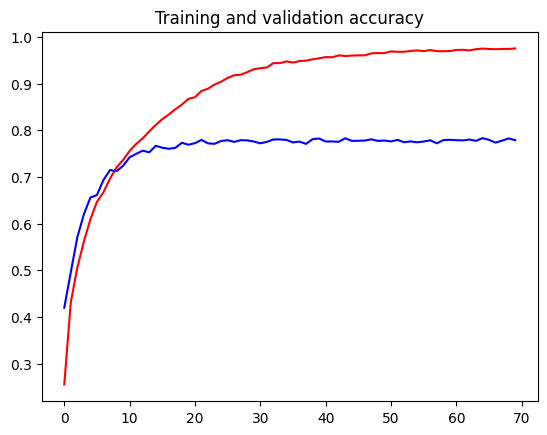

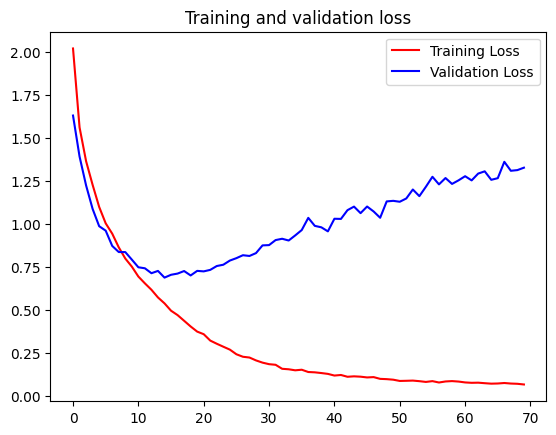

In [14]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

## Menggunakan Augmentation

In [16]:
ig2=ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1./255.0)
augmentedTrainX=ig2.flow(trainX,trainY,batch_size=256)
augmentedTestX=ig2.flow(testX,testY,batch_size=5000)

In [17]:
model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (2,2), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 256)         131328    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

In [18]:
model2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.03,momentum=0.9),
    metrics=["accuracy",]
)

In [19]:
EPOCHS=70
history = model2.fit(
      augmentedTrainX,
      epochs=EPOCHS,
      validation_data=normalizedTestX,
      verbose=2)

Epoch 1/70
196/196 - 44s - loss: 2.0321 - accuracy: 0.2440 - val_loss: 1.7137 - val_accuracy: 0.3812 - 44s/epoch - 223ms/step
Epoch 2/70
196/196 - 36s - loss: 1.6518 - accuracy: 0.3969 - val_loss: 1.4136 - val_accuracy: 0.4860 - 36s/epoch - 186ms/step
Epoch 3/70
196/196 - 35s - loss: 1.5030 - accuracy: 0.4516 - val_loss: 1.3332 - val_accuracy: 0.5079 - 35s/epoch - 180ms/step
Epoch 4/70
196/196 - 35s - loss: 1.4060 - accuracy: 0.4944 - val_loss: 1.2227 - val_accuracy: 0.5628 - 35s/epoch - 181ms/step
Epoch 5/70
196/196 - 35s - loss: 1.3386 - accuracy: 0.5198 - val_loss: 1.1630 - val_accuracy: 0.5839 - 35s/epoch - 180ms/step
Epoch 6/70
196/196 - 35s - loss: 1.2649 - accuracy: 0.5486 - val_loss: 1.0872 - val_accuracy: 0.6114 - 35s/epoch - 179ms/step
Epoch 7/70
196/196 - 34s - loss: 1.2050 - accuracy: 0.5697 - val_loss: 1.0851 - val_accuracy: 0.6089 - 34s/epoch - 174ms/step
Epoch 8/70
196/196 - 36s - loss: 1.1391 - accuracy: 0.5957 - val_loss: 1.0109 - val_accuracy: 0.6476 - 36s/epoch - 181

In [20]:
# Reset states generated by Keras
# tf.keras.backend.clear_session()

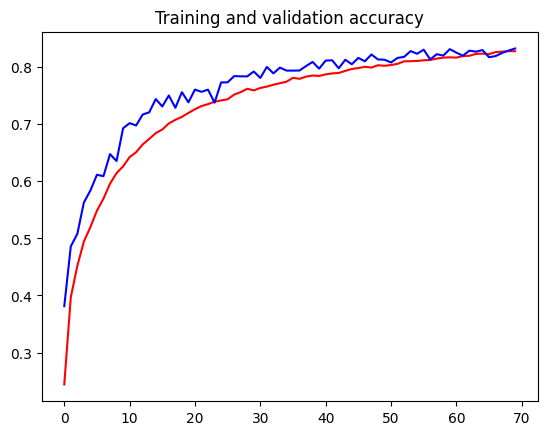

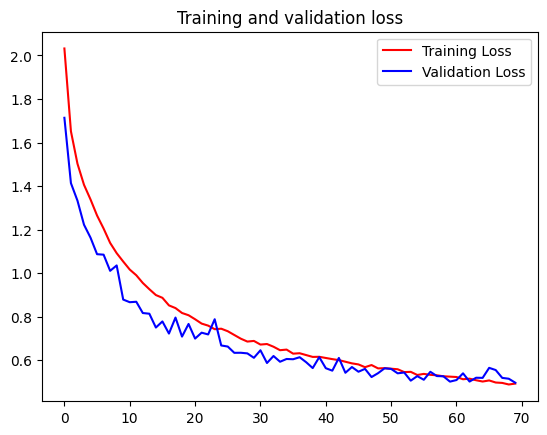

In [21]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()